## Exploratory Analysis
**Dataset: ['product_sales.csv'](https://github.com/Overmarss/Product-Sales-Report/blob/main/product_sales.csv)**

## Notebook contents:
- [How number of new products sold and revenue from sales differ between different types of the sales method?](#How-number-of-new-products-sold-and-revenue-from-sales-differ-between-different-types-of-the-sales-method?)
- [Was there any difference in revenue over time for each of the methods?](#Was-there-any-difference-in-revenue-over-time-for-each-of-the-methods?)
- [How number of new products sold and revenue from sales differ between different types of the sales method?](#How-number-of-new-products-sold-and-revenue-from-sales-differ-between-different-types-of-the-sales-method?)
- [Number of visits customers has made on our website in last 6 weeks](#Number-of-visits-customers-has-made-on-our-website-in-last-6-weeks)
- [Distribution of revenue by sales method](#Distribution-of-revenue-by-sales-method)
- [Difference in average revenue over time for each of the sales methods](#Difference-in-average-revenue-over-time-for-each-of-the-sales-methods)
- [What number of new products sales is dominant?](#What-number-of-new-products-sales-is-dominant?)
- [Distribution of revenue per year since the customer has been buying from us](#Distribution-of-revenue-per-year-since-the-customer-has-been-buying-from-us)
- [Distribution of revenue per state](#Distribution-of-revenue-per-state)
- [Business Metrics](#Business-Metrics)
- [Recommendation](#Recommendation)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.expand_frame_repr', False)

In [2]:
product_sales_raw = pd.read_csv('product_sales_old.csv') #initial dataset 
product_sales = pd.read_csv('product_sales.csv') #dataset after data cleaning and validation using SQL
print(product_sales.head())
print("Shape: ", product_sales.shape)
print(product_sales.info())
print(product_sales.describe())

   week  sales_method                           customer_id  nb_sold  revenue  years_as_customer  nb_site_visits       state
0     2         Email  18919515-a618-430c-9a05-2c7d8fea96af       10    97.22                 38              24  California
1     4          Call  2ea97d34-571d-4e1b-95be-fea1c404649f       10    50.47                 38              27  California
2     5  Email + Call  ace324ea-fb31-4644-8ad6-12e41e76b1a8       12    93.93                 38              29    New York
3     2         Email  38a2040b-ab8d-4522-a453-07b3d1ff47af       10   101.41                 38              25   Tennessee
4     1         Email  ae6df2ea-c55a-4251-803f-3daaf49d3f94        9    85.49                 38              22       Texas
Shape:  (15000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               150

### How number of new products sold and revenue from sales differ between different types of the sales method?

We have a report for the last 6 weeks of new products sold by different sales methods. The proportion of Revenue for new sales by _Email_ is 51.3% (723,416\$), _Email+Call_ - 31.3%, _Call_ - 17.4% of total revenue, and the proportion of new sales by _Email_ is 48.0% (244,565\$), _Email+Call_ - 20.8%, _Call_ - 31.2% of total revenue. We can see that the revenue of sales by _Email_ is half of the total revenue, and sales by _Email_ and _Email+Call_ is 82.6% of total revenue. So, considering the required amount of work for selling to cusomers these two methods are extremely effective compared to the _Call_ method forasmuch count of customers engaged (4,962 - 33.1%). Revenue per customer engaged by the _Email+Call_ is **171.5\$** and by the _Call_ is **49.3\$**. Therefore, considering that _Email+Call_ requires more than twice more work for the sales team as for the _Call_ method, we can conclude that our goal is to concentrate and improve on **Email+Call** sales method.

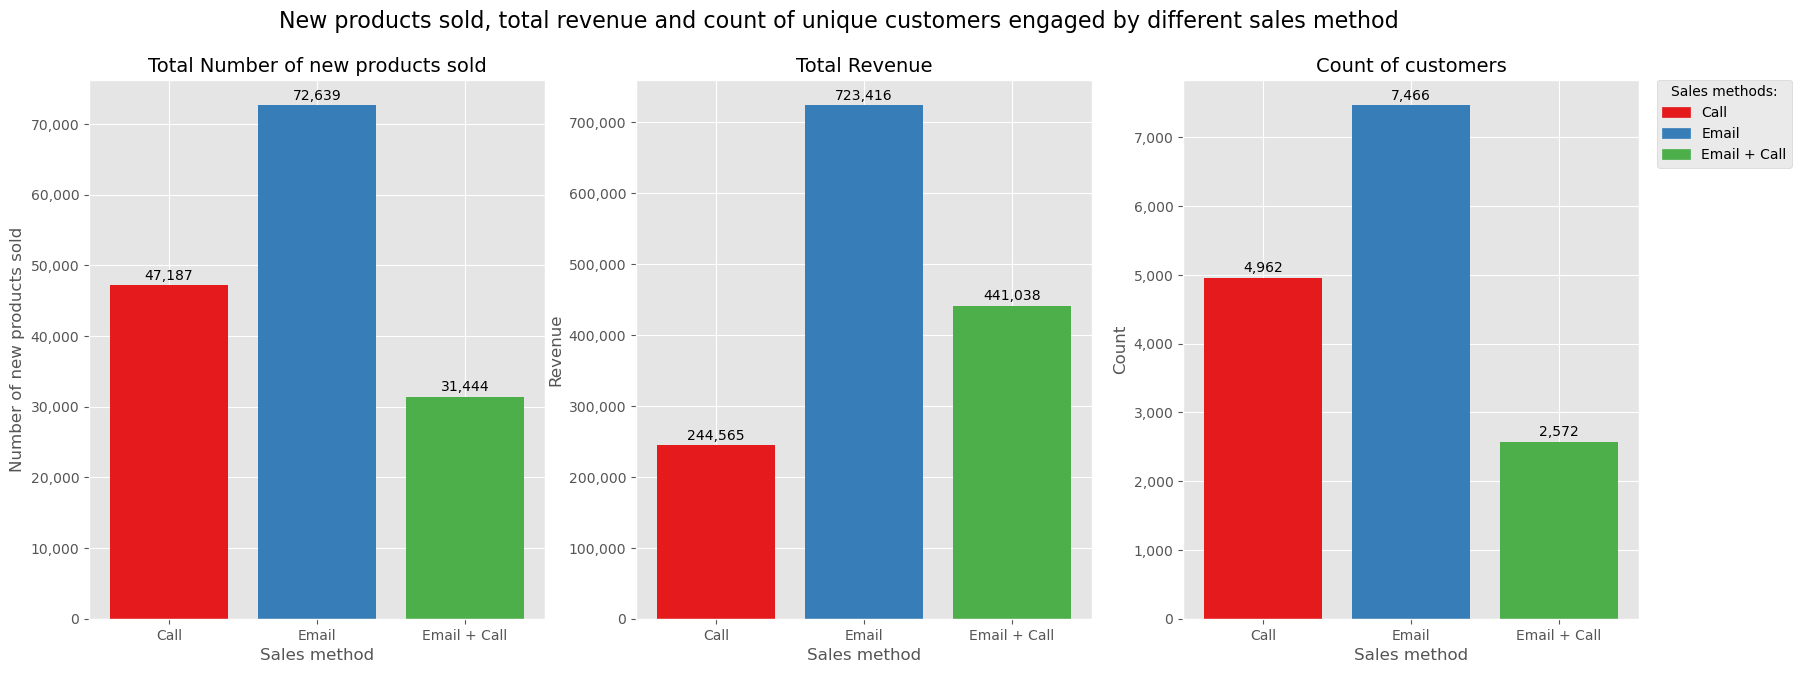

In [3]:
fig, ax = plt.subplots(1,3,sharex=True,figsize=(20,7))

formatter = plt.FuncFormatter(lambda x, p: format(int(x), ','))
for nn, x in enumerate(ax):
    ax[nn].yaxis.set_major_formatter(formatter)
    
b_colors = {'Call':'#e41a1c', 'Email':'#377eb8', 'Email + Call':'#4daf4a'}
labels = list(b_colors.keys())
colors = list(b_colors.values())
handles = [plt.Rectangle((0,0),1,1, color=x) for x in colors]

nb_sold_sum = product_sales.groupby("sales_method").nb_sold.sum().reset_index()
revenue_sum = product_sales.groupby("sales_method").revenue.sum().reset_index()
customers_count = product_sales.groupby("sales_method").customer_id.count().reset_index()
nb_sold_sum_bar = ax[0].bar(nb_sold_sum.sales_method, nb_sold_sum.nb_sold, label=labels, color=colors)
revenue_sum_bar = ax[1].bar(revenue_sum.sales_method, revenue_sum.revenue, label=labels, color=colors)
customers_count_bar = ax[2].bar(customers_count.sales_method, customers_count.customer_id, label=labels, color=colors)

ax[0].set_title("Total Number of new products sold", fontsize=14)
ax[0].set_ylabel('Number of new products sold')
ax[0].set_xlabel('Sales method')
ax[0].bar_label(nb_sold_sum_bar, padding = 2, labels=[f'{x:,.0f}' for x in nb_sold_sum_bar.datavalues])
ax[1].set_title("Total Revenue", fontsize=14)
ax[1].set_ylabel('Revenue')
ax[1].set_xlabel('Sales method')
ax[1].bar_label(revenue_sum_bar, padding = 2, labels=[f'{x:,.0f}' for x in revenue_sum_bar.datavalues])
ax[2].set_title("Count of customers", fontsize=14)
ax[2].set_ylabel('Count',fontsize=12)
ax[2].set_xlabel('Sales method')
ax[2].bar_label(customers_count_bar, padding = 2, labels=[f'{x:,.0f}' for x in customers_count_bar.datavalues])
fig.suptitle('New products sold, total revenue and count of unique customers engaged by different sales method', fontsize=16)
fig.legend(handles, labels, title='Sales methods:', loc='upper right', bbox_to_anchor=(.98, .89))

#plt.savefig('slide1.png', bbox_inches='tight', transparent=True) #code to save transpaernt .png graph
plt.show()

### Was there any difference in revenue over time for each of the methods?
It's important to see how sales are distributed through the observed time. In the first week, the major sales method is _Email_ with a revenue - 247,518.3\$, next weeks revenue by this method is noticeably fading, with a little growth in the 4th week. The _Call_ method revenue is slowly growing through the weeks but twice fold on the 6th week. The _Email+Call_ method has strong growth through the weeks, and on the 5th and 6th week it has the best revenue, 137,236\$ (50\%) and 20,075\$ (68.4\%) respectively. Number of the new product sales looks proportional to its revenue. The 6th week has the lowest revenue and number of new sales, it is the question for further analyses.

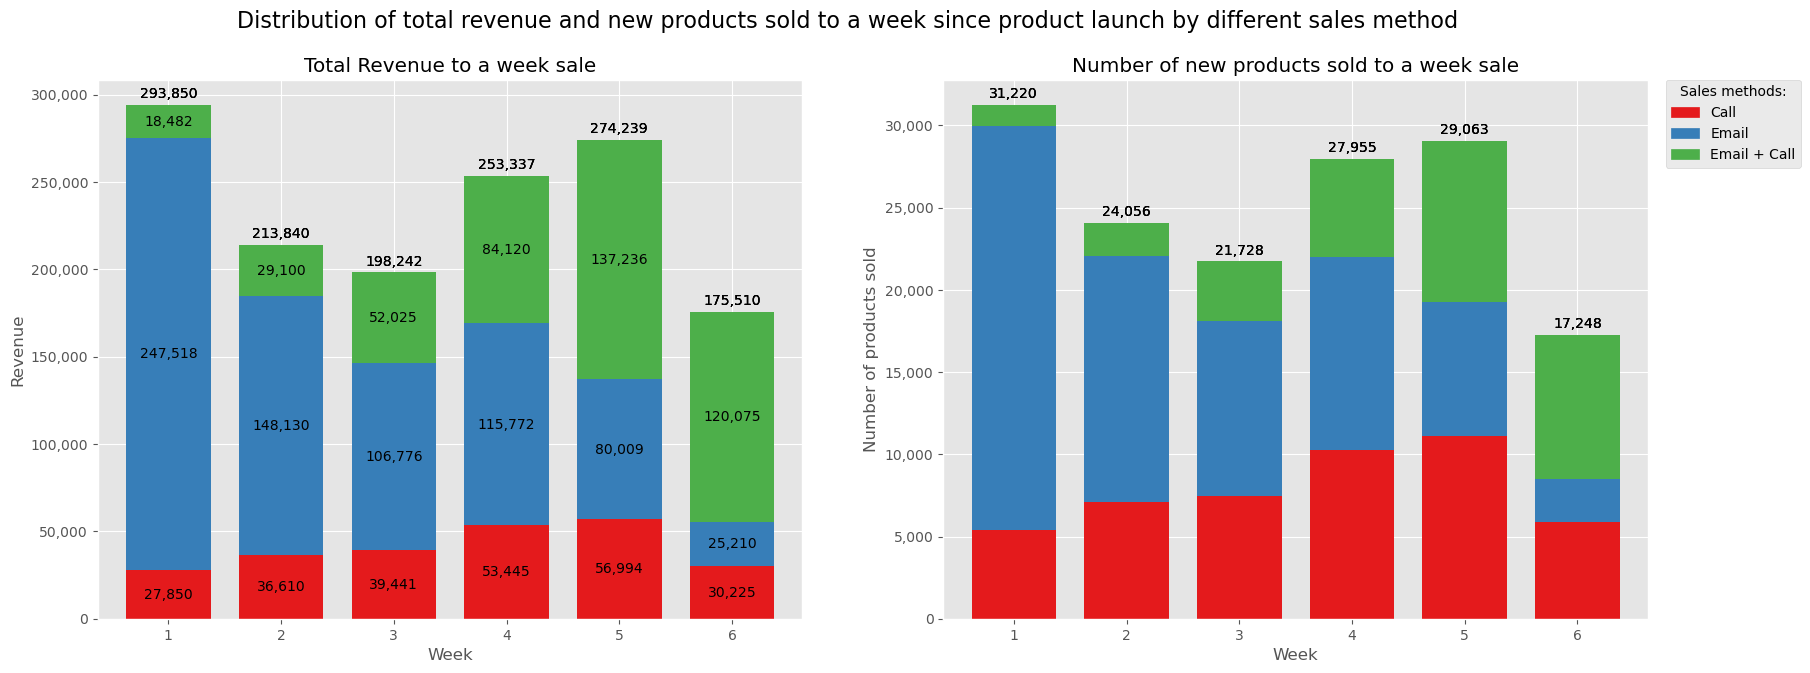

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
for nn, x in enumerate(ax):
    ax[nn].yaxis.set_major_formatter(formatter)

w_sales_method_revenue_sum = product_sales.pivot_table(index="week", columns="sales_method",values="revenue",aggfunc='sum')
w_sales_method_nb_sold_sum = product_sales.pivot_table(index="week", columns="sales_method",values="nb_sold",aggfunc='sum')
total_revenue_byweek = product_sales.groupby("week").revenue.sum()
total_nb_sold_byweek = product_sales.groupby("week").nb_sold.sum()

ax1 = w_sales_method_revenue_sum.plot(ax=ax[0], kind='bar', stacked=True, color=colors, width=.75, rot = 0, legend=None,
                        title="Total Revenue to a week sale",
                        ylabel='Revenue',
                        xlabel='Week')
for d in ax[0].containers:
    ax[0].bar_label(d, label_type='center', labels=[f'{x:,.0f}' for x in d.datavalues])
    ax[0].bar_label(ax[0].containers[-1], labels=[f'{y:,.0f}' for y in total_revenue_byweek], padding = 3, label_type='edge')

ax2 = w_sales_method_nb_sold_sum.plot(ax=ax[1], kind='bar', stacked=True, color=colors, width=.75, rot = 0, legend=None,
                    title='Number of new products sold to a week sale',
                    ylabel='Number of products sold',
                    xlabel='Week')
for c in ax[1].containers:
    ax[1].bar_label(d, label_type='center', labels=[f'{x:,.0f}' for x in c.datavalues])
    ax[1].bar_label(ax[1].containers[-1], labels=[f'{y:,.0f}' for y in total_nb_sold_byweek], padding = 3, label_type='edge')

fig.suptitle('Distribution of total revenue and new products sold to a week since product launch by different sales method', fontsize=16)
fig.legend(handles, labels, title='Sales methods:', loc='upper right', bbox_to_anchor=(.98, .89))

plt.show()

### Number of visits customers has made on our website in last 6 weeks
The first week since the new product launch had the most considerable amount of visits - 86,095, and 2nd week it faded to 28.5%, next weeks it rather grew to the 5th week. But in the 6th week the number of visits dropped twice to 34,711 on 51.0%. So, it could be one of the problems for sales slowing, when revenue fell in the same week 36%.

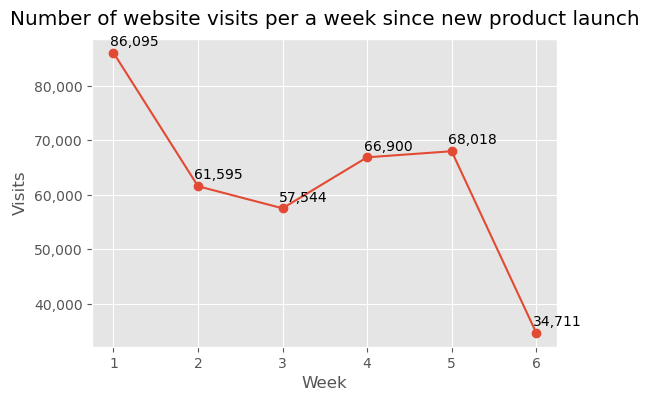

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
ax.get_yaxis().set_major_formatter(formatter)

weeks_visits = product_sales.groupby("week").nb_site_visits.sum().reset_index()

plot = ax.plot(weeks_visits.week, weeks_visits.nb_site_visits, marker='o')
ax.set_title("Number of website visits per a week since new product launch", pad=10)
ax.set_ylabel('Visits')
ax.set_xlabel('Week')
for x,y in zip(weeks_visits.week, weeks_visits.nb_site_visits):
    label = "{:,.0f}".format(y)
    plt.annotate(label, (x,y), textcoords="offset points", xytext=(15,5), ha='center')
    
plt.show()

### Distribution of revenue by sales method
As we see from this graph _Call_ method has the lowest range of revenue and the _Email+Call_ method has the largest range of revenue. Considering the resources needed for _Call_ method is ineffective, while _Email_ and _Email+Call_ methods bring much more revenue. The *Email+Call* method brings significant value, with majority of revenue in range **from 150\$ to 185\\$ per customer**.

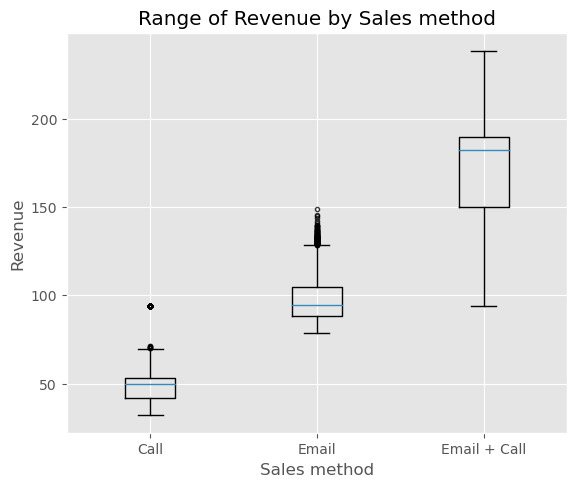

In [6]:
fig = plt.figure(figsize = [5, 4])

revenue_data_bymethods = []
for i in labels:
    a = product_sales['sales_method'] == i
    row = product_sales[a]
    revenue_data_bymethods.append(row['revenue'])

ax = fig.add_axes([1, 1, 1, 1], title='Range of Revenue by Sales method', xlabel = 'Sales method', ylabel='Revenue')
flierprops = dict(marker ='o', color ='#e7298a', alpha = .75,  markersize = 3)
ax.boxplot(revenue_data_bymethods, flierprops=flierprops)
ax.set_xticklabels(labels)

plt.show()

### Difference in average revenue over time for each of the sales methods
When we visualize the change in average revenue through the weeks, we can see that average revenue is always slowly growing by all methods. And an average revenue by _Email+Call_ is approximately bigger than the sum of _Call_ and _Email_ methods.

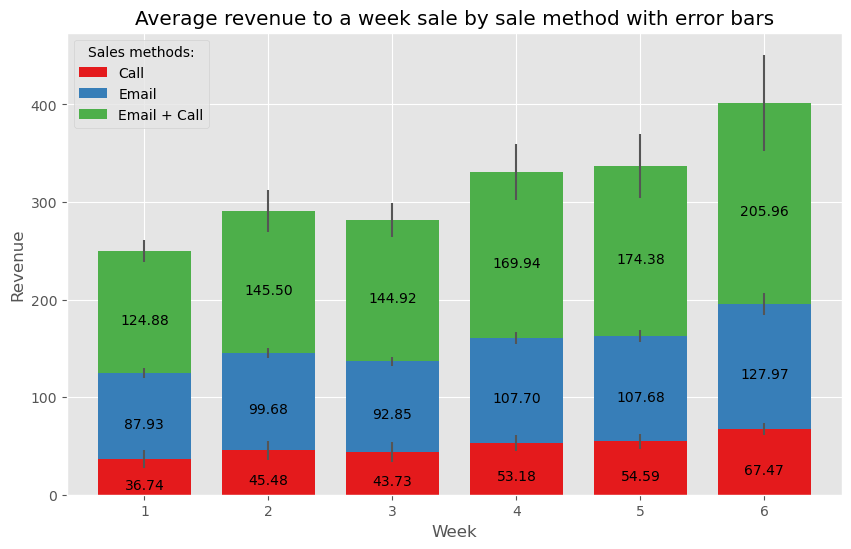

In [7]:
revenue_mean = product_sales.pivot_table(index="week", columns="sales_method",values="revenue",aggfunc='mean')
revenue_std = product_sales.pivot_table(index="week", columns="sales_method",values="revenue",aggfunc='std')
bar = revenue_mean.plot(kind='bar', stacked=True, figsize=(10,6), yerr=revenue_std, color=colors, width=.75,
                       title='Average revenue to a week sale by sale method with error bars',
                       ylabel='Revenue',
                       xlabel='Week')
plt.xticks(rotation='horizontal')
for c in bar.containers[1::2]:
    bar.bar_label(c, label_type='center',  fmt='\n%.2f')
plt.legend(title='Sales methods:')

plt.show()

### What number of new products sales is dominant?
We can see on this histogram the distribution of the number of new products sold. So, customers more frequently buy between 9 and 10 new products. It shows what amount of new products we can effectively advertise and sell to customers.

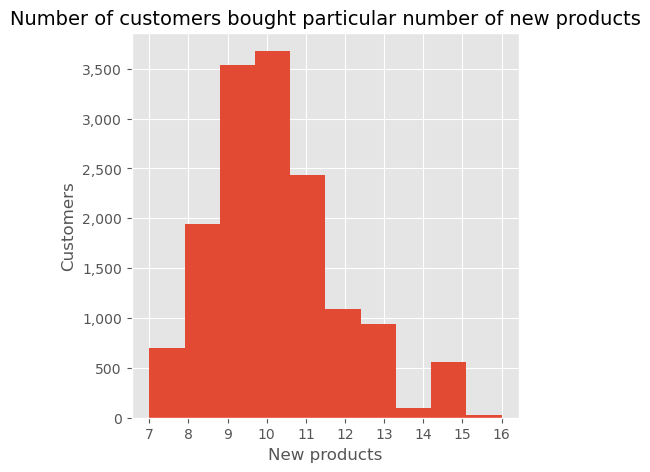

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
ax.get_yaxis().set_major_formatter(formatter)

bin = max(product_sales.nb_sold) - min(product_sales.nb_sold) + 1
bins = ax.hist(product_sales.nb_sold, bins = bin)

ax.set_xticks(product_sales.nb_sold.unique())
ax.set_title("Number of customers bought particular number of new products", fontsize=14)
ax.set_ylabel('Customers')
ax.set_xlabel('New products')

plt.show()

### Distribution of revenue per year since the customer has been buying from us
We can see that the years since customers buying products with customers active less than **1** year till **3 years** have essential values of revenue. Beginning from the **4th year** since customers buy new products, revenue from them is fading compared to new customers (less than **1 year**).

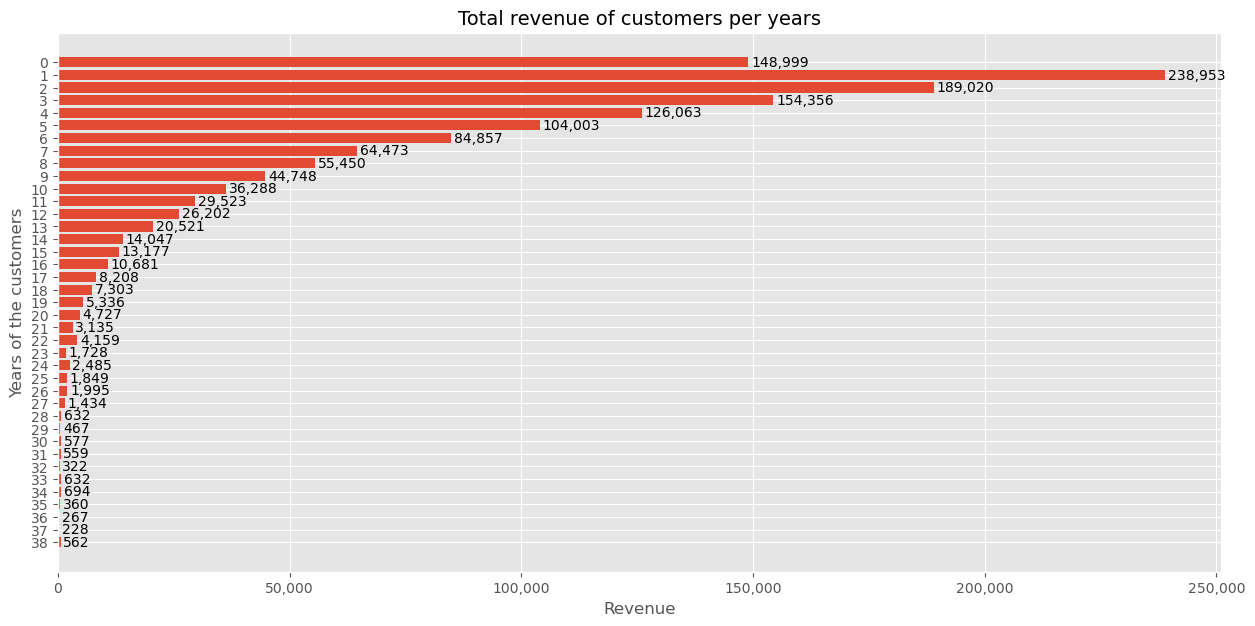

In [9]:
fig, ax = plt.subplots(figsize=(15,7))

ax.get_xaxis().set_major_formatter(formatter)

years_as_customer_revenue = product_sales.groupby("years_as_customer").revenue.sum().reset_index().sort_values(by='years_as_customer', ascending=False)
years_as_customer_nb_site_visits = product_sales.groupby("years_as_customer").nb_site_visits.sum().reset_index().sort_values(by='years_as_customer', ascending=False)

ax1 = ax.barh(years_as_customer_revenue.years_as_customer.sort_values(ascending=True), years_as_customer_revenue.revenue)
ax.bar_label(ax.containers[-1], padding = 2, labels=[f'{x:,.0f}' for x in ax1.datavalues])
ax.set_yticks([i for i in range(len(years_as_customer_revenue.years_as_customer))[::1]], years_as_customer_revenue.years_as_customer)
ax.set_title("Total revenue of customers per years", fontsize=14)
ax.set_ylabel('Years of the customers')
ax.set_xlabel('Revenue')

plt.savefig('slide6.png', bbox_inches='tight', transparent=True)
plt.show()

### Distribution of revenue per state
This graph shows us the distribution of revenue per state. _California, Texas, New York, and Florida_ states have the biggest revenue. This graph is helpful for marketing and advertiser teams to consider promising states for growth. We can consider of specific state or region where our products can be distributed.

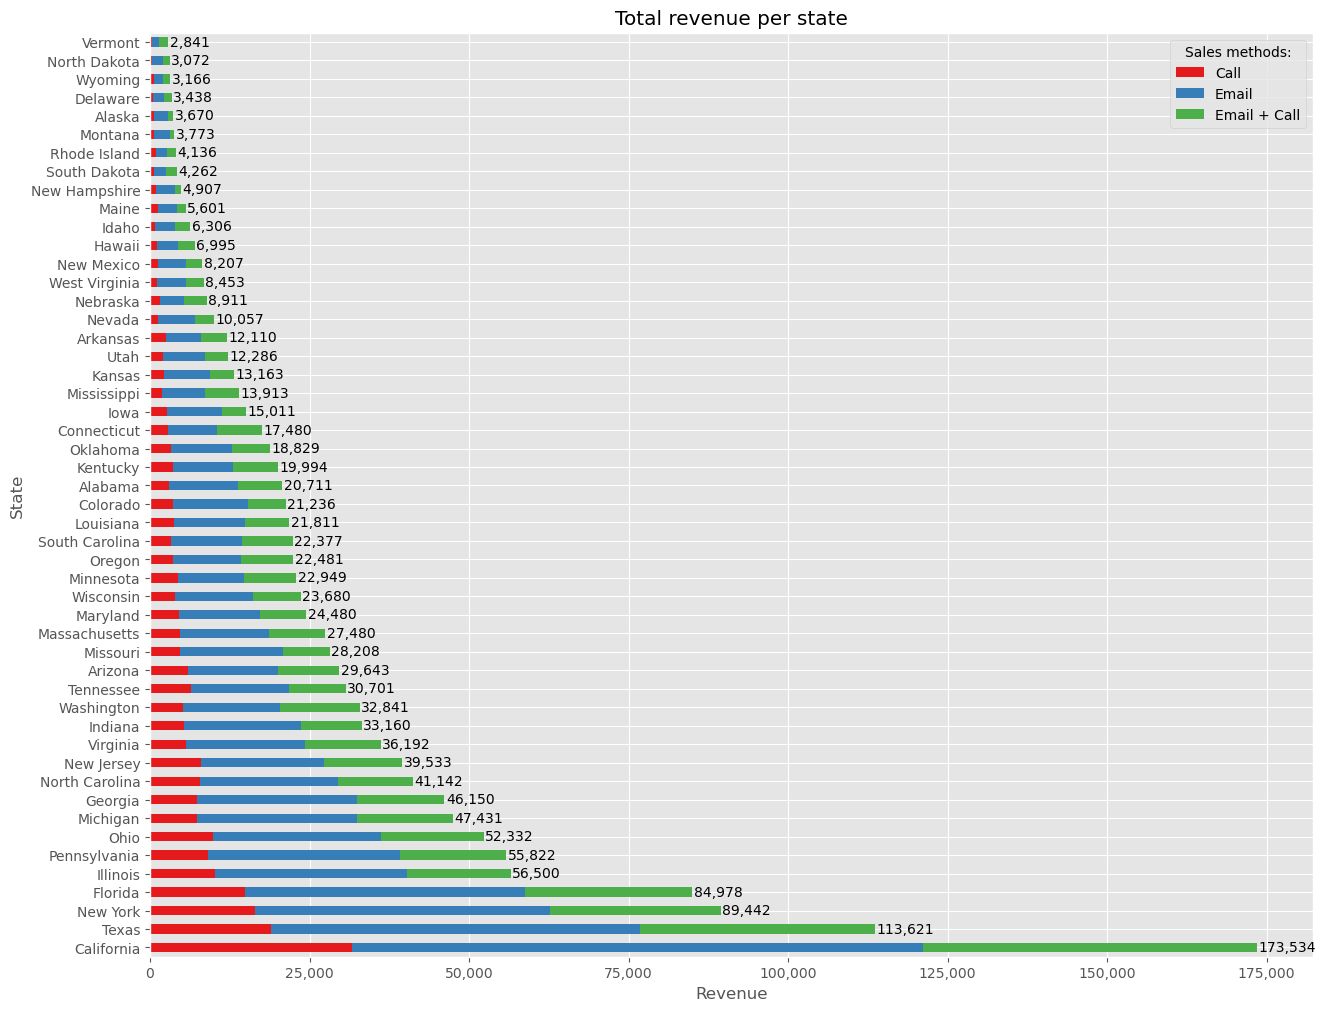

In [10]:
state_revenue_sum_total = product_sales.pivot_table(index=["state"], columns=["sales_method"],values="revenue",aggfunc='sum')
state_revenue_sum_total['Total'] = state_revenue_sum_total.sum(axis=1)
state_revenue_sum_total.sort_values('Total', ascending=False, inplace=True)
state_revenue_sum = state_revenue_sum_total.drop('Total', axis=1)
state_revenue_sum_barh = state_revenue_sum.plot(kind='barh', stacked=True, figsize=(15,12), color=colors,
                                                                                   title='Total revenue per state')
state_revenue_sum_barh.bar_label(state_revenue_sum_barh.containers[-1], padding=1, labels=[f'{y:,.0f}' for y in state_revenue_sum_total.Total])
state_revenue_sum_barh.set_xlabel('Revenue')
state_revenue_sum_barh.set_ylabel('State')
state_revenue_sum_barh.get_xaxis().set_major_formatter(formatter)
plt.legend(title='Sales methods:')

plt.show()

## Business Metrics

Considering on sales approaches sales team used, I would recommend using further **revenue of new products by sales methods per week** as our metric.

In the first four weeks when products launch primary sales method is _Email_, and in the 5th and 6th weeks, the essential sales method is **Email+Call**. Our goal is to increase resources for improving the **Email+Call** strategy, while it is a point of growth in the amount of revenue and its average value compared to others sales strategies. The **Email+Call** strategy has an average revenue per customer 171.5\$, which is 350% more valuable compared to the _Call_ strategy - 49.3\$. Also, it's reasonable to decrease the number of resources for the _Call_ method, since it's less effective and requires much more work for the sales team.

## Recommendation

For the following weeks since the products launched, I would recommend we can focus on the following steps:
- Using key metrics to monitor whether there is a strong sign on sales strategies to see the sales will increase.
- We need to increase marketing company, while the number of visits customers has made on our website on 6th week decreased by 51%.
- The sales team should change the distribution of work resources:	
	- Decrease resources for the _Call_ strategy, while it requires much more work resources and shows the lowest average revenue.
	- Increase resources for **Email+Call** strategy, it takes lower resources, shows the biggest average revenue and stays as the primary way of revenue from the 5th week since the product launch.
	- Track changing of the revenue and count customers that was engaged.
	- Considering sales per state and its markets we can investigate regions where we could increase our growth.
- Data Collection for in-depth analysis:
	- Test and provide other sales strategies.
	- Arrange the number of sales by groups or categories of products to see the difference in what type of product is better sale compared to sales strategies.